In [16]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from chart_studio.plotly import plot, iplot
import cufflinks as cf
cf.go_offline(connected=True)

## Risk free rate

금융투자협회 채권정보센터에서 채권시가평가기준 수익률을 제공 http://www.kofiabond.or.kr/

해당기간(2010~2019)의 3월물 채권의 민평평균 데이터를 가져왔다.

Calendar return portfolio에서 rf를 차감하여 사용했음.

In [30]:
return_df = pd.read_csv('../data/kospi/preprocessed/df_return.csv',index_col=0)*100 #수익률들 다 % 단위로 변환
rf_df = pd.read_csv('../data/kospi/preprocessed/rf_df.csv',index_col=0)
ex_return_df = pd.read_csv('../data/kospi/preprocessed/excess_return_df.csv',index_col=0) #rf 뺀 초과수익률 df
rm_df = pd.read_csv('../data/kospi/raw/rm_kospi200.csv',index_col=0)*100

In [18]:
# # rf_index = [int(x[0:4]+x[5:7]+x[8:10]) for x in rf.iloc[:,0].index] #RF index 주가데이터와 맞춰주기
# rf_df = pd.DataFrame( rf.iloc[:,0].values,rf_index,columns ={'return'})
# rf_df = rf_df.drop(set(rf_index)-set(price_index))
# rf_df = rf_df[::-1]

In [19]:
ex_return = return_df.values - rf_df['return'].values[:,np.newaxis] #RF를 뺀 excess return
ex_return_df = pd.DataFrame(data = ex_return,index = rf_df.index,columns = return_df.columns)

In [32]:
ex_return_df

,삼양홀딩스,유한양행,CJ대한통운,두산,대림산업,한국테크놀로지그룹,기아차,동아쏘시오홀딩스,SK하이닉스,영풍,...,현대백화점,한국금융지주,GS,하나금융지주,아모레퍼시픽,LF,후성,SK이노베이션,CJ제일제당,KB금융
20100104,-1.930843,-3.502864,-6.260071,-5.000941,0.144038,-4.138137,1.360648,1.511752,1.723672,-2.380000,...,-1.935556,-0.141194,-2.527929,-1.012219,-1.523689,-1.270650,-3.046489,-2.805532,-1.650073,-2.882513
20100105,-2.898935,-1.771838,-2.523486,-2.555587,-3.277866,-6.733390,-7.868846,-5.711371,-5.452033,-5.679192,...,-6.764779,-1.318102,-1.895556,-0.690825,-5.205512,-6.258495,-2.984122,1.506154,3.940193,-3.518451
20100106,-3.124746,-1.210800,1.336471,3.161953,-0.328166,-2.963946,-1.322188,-5.052609,2.799186,-4.703636,...,-4.654815,-3.207052,-1.307552,-2.340000,-8.351538,-3.155661,-0.908341,-1.928477,-2.112727,-2.680716
20100107,-3.904085,-3.158313,-1.965390,0.441419,-2.552019,-4.848424,-6.854005,-1.523049,-2.930998,-2.692439,...,-1.846066,-4.360816,-1.298102,-3.647434,-4.528737,-3.142368,-1.521065,-2.729836,-3.453787,-3.516581
20100108,-2.540257,-3.153997,-0.543216,4.157385,-1.263488,-1.439526,-0.199182,-3.100650,-1.285410,-2.683832,...,-4.668491,4.386429,-2.743526,-2.011046,-3.856563,-1.314975,-1.808018,-1.486955,-2.310000,-2.136990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20191223,-0.321963,-0.429684,-2.560932,-0.548780,-1.258000,-2.299667,-1.146143,0.150451,-1.679053,-1.576471,...,-1.379212,-0.569295,-0.687658,-0.868895,-3.739390,-1.532725,-3.964027,-1.258000,-0.429843,0.474926
20191224,0.287595,-1.874026,-2.248099,-1.258000,-1.913022,-1.258000,-1.369732,-0.795037,-2.103666,0.818677,...,-2.107515,-1.394799,-0.690892,-2.420791,-0.494641,0.119410,0.132645,-0.932267,-1.874016,-2.159804
20191226,-0.043344,0.391775,-1.261000,0.147451,-1.480780,0.142509,-0.366145,-0.800171,-0.194902,-2.512956,...,-1.138601,-0.987027,-1.261000,-0.215248,-2.018576,0.097696,-1.884441,-0.611649,-0.847777,-1.362112
20191227,-1.562752,-0.837372,1.738000,-3.623111,-3.464643,-3.338125,-2.924971,-3.555578,0.003823,-1.737436,...,-1.384249,-2.354896,-3.141699,-4.237420,-2.025359,-3.674869,0.494587,-3.842645,1.618658,-3.994794


## CAR 

CAR은 Cumulative Abnormal Return 이며 abnormal return은 normal return 에 market return을 빼줘서 구한다.

처음에는 kospi200수익률을 사용했는데 universe가 113개의 기업이기 때문에 이들의 평균수익률로 바꿔주는걸로 수정.

In [21]:
rm_df.head() #kospi200 수익률

,return
dates,
20100104,0.730000
20100105,-0.290841
20100106,0.821217
20100107,-1.495527
20100108,0.610004


In [35]:
abnormal_return = return_df.values - rm_.values[:,np.newaxis]

In [36]:
rm_ = return_df.mean(axis=1)
abnormal_return = return_df.values - rm_.values[:,np.newaxis]
abnormal_df = pd.DataFrame(abnormal_return,index = return_df.index, columns= return_df.columns)
abnormal_df

,삼양홀딩스,유한양행,CJ대한통운,두산,대림산업,한국테크놀로지그룹,기아차,동아쏘시오홀딩스,SK하이닉스,영풍,...,현대백화점,한국금융지주,GS,하나금융지주,아모레퍼시픽,LF,후성,SK이노베이션,CJ제일제당,KB금융
20100104,-0.132617,-1.704638,-4.461844,-3.202715,1.942265,-2.339911,3.158875,3.309978,3.521898,-0.581774,...,-0.137329,1.657032,-0.729703,0.786007,0.274537,0.527576,-1.248263,-1.007306,0.148153,-1.084286
20100105,-0.042839,1.084258,0.332610,0.300510,-0.421770,-3.877293,-5.012750,-2.855275,-2.595937,-2.823095,...,-3.908682,1.537994,0.960541,2.165272,-2.349416,-3.402399,-0.128026,4.362250,6.796290,-0.662355
20100106,-1.326516,0.587430,3.134700,4.960182,1.470064,-1.165716,0.476042,-3.254379,4.597416,-2.905407,...,-2.856585,-1.408822,0.490678,-0.541770,-6.553308,-1.357431,0.889888,-0.130248,-0.314497,-0.882486
20100107,-0.913492,-0.167721,1.025203,3.432012,0.438574,-1.857831,-3.863412,1.467544,0.059595,0.298153,...,1.144526,-1.370224,1.692490,-0.656841,-1.538145,-0.151776,1.469527,0.260757,-0.463194,-0.525989
20100108,-0.977807,-1.591548,1.019234,5.719834,0.298961,0.122923,1.363267,-1.538201,0.277040,-1.121382,...,-3.106041,5.948878,-1.181076,-0.448597,-2.294114,0.247474,-0.245569,0.075495,-0.747550,-0.574540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20191223,0.802928,0.695206,-1.436041,0.576110,-0.133110,-1.174776,-0.021253,1.275341,-0.554162,-0.451581,...,-0.254322,0.555595,0.437232,0.255995,-2.614499,-0.407835,-2.839137,-0.133110,0.695048,1.599816
20191224,1.796917,-0.364704,-0.738777,0.251322,-0.403700,0.251322,0.139590,0.714285,-0.594344,2.327999,...,-0.598193,0.114523,0.818430,-0.911469,1.014681,1.628732,1.641967,0.577055,-0.364694,-0.650482
20191226,0.802657,1.237776,-0.414999,0.993452,-0.634779,0.988510,0.479855,0.045830,0.651099,-1.666955,...,-0.292600,-0.141027,-0.414999,0.630752,-1.172575,0.943696,-1.038441,0.234351,-0.001776,-0.516111
20191227,0.386307,1.111688,3.687059,-1.674052,-1.515584,-1.389065,-0.975912,-1.606519,1.952882,0.211624,...,0.564810,-0.405837,-1.192640,-2.288361,-0.076299,-1.725809,2.443647,-1.893586,3.567718,-2.045734


In [44]:
ex_values = [ x for x in return_df.mean(1).values]
ex_index = [x for x in return_df.index]

In [70]:
mean_ex_return.head()

,mean_return
dates,
2010-01-04,0.581774
2010-01-05,-0.516096
2010-01-06,0.541770
2010-01-07,-0.670593
2010-01-08,0.747550


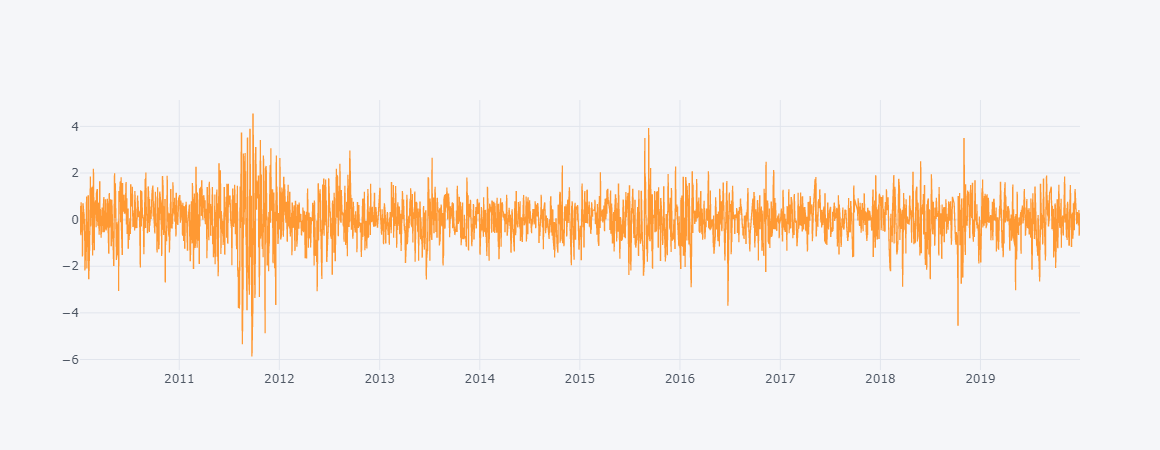

In [68]:
mean_ex_return.iplot()

In [ ]:
mean

abnormal return 중 excess